In [78]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
data=pd.read_csv('C:/Users/Taha/Downloads/water_potability.csv')

In [79]:
data.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [80]:
data.shape

(3276, 10)

In [81]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [82]:
data.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [83]:
data[data['Trihalomethanes'].isnull()]

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
62,NaN,229.485694,35729.692709,8.810843,384.943779,296.397547,16.927092,NaN,3.855602,0
81,5.519126,168.728583,12531.601921,7.730723,NaN,443.570372,18.099078,NaN,3.758996,0
110,9.286155,222.661551,12311.268366,7.289866,332.239359,353.740100,14.171763,NaN,5.239982,0
118,7.397413,122.541040,8855.114121,6.888689,241.607532,489.851600,13.365906,NaN,3.149158,0
119,7.812804,196.583886,42550.841816,7.334648,NaN,442.545775,14.666917,NaN,6.204846,0
...,...,...,...,...,...,...,...,...,...,...
3174,6.698154,198.286268,34675.862845,6.263602,360.232834,430.935009,12.176678,NaN,3.758180,1
3185,6.110022,234.800957,16663.539074,5.984536,348.055211,437.892115,10.059523,NaN,2.817780,1
3219,6.417716,209.702425,31974.481631,7.263425,321.382124,289.450118,11.369071,NaN,4.210327,1
3259,9.271355,181.259617,16540.979048,7.022499,309.238865,487.692788,13.228441,NaN,4.333953,1


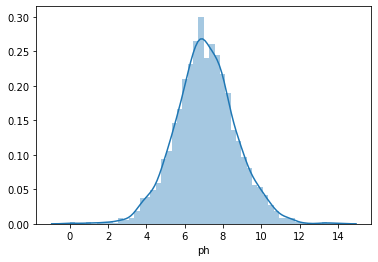

In [84]:
sns.distplot(data['ph'])


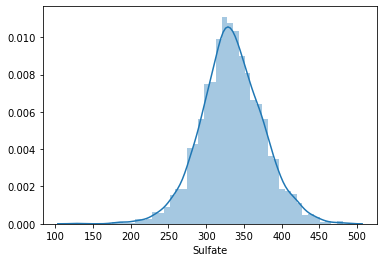

In [87]:
sns.distplot(data['Sulfate'])


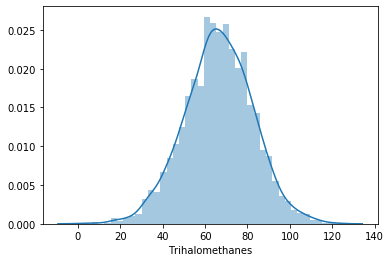

In [90]:
sns.distplot(data['Trihalomethanes'])

In [93]:
def fill_nan(data):
    for index, column in enumerate(data.columns[:9]):
        
        data[column] = data[column].fillna(data.groupby('Potability')[column].transform('mean'))
    return data
        
data = fill_nan(data)


In [94]:
data.isna().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

In [95]:
#data['Potability']=data['Potability'].astype("category")

In [96]:
#data['Potability']=data['Potability'].cat.codes

In [97]:
data.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000
mean,7.080855,196.369496,22014.092526,7.122277,333.785123,426.205111,14.284970,66.395671,3.966786,0.390110
std,1.469958,32.879761,8768.570828,1.583085,36.145701,80.824064,3.308162,15.769901,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.277673,176.850538,15666.690297,6.127421,317.094638,365.734414,12.065801,56.647656,3.439711,0.000000
50%,7.085378,196.967627,20927.833607,7.130299,334.564290,421.884968,14.218338,66.303555,3.955028,0.000000
75%,7.870050,216.667456,27332.762127,8.114887,350.385756,481.792304,16.557652,76.666609,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


In [98]:
data['Potability'].value_counts()

0    1998
1    1278
Name: Potability, dtype: int64

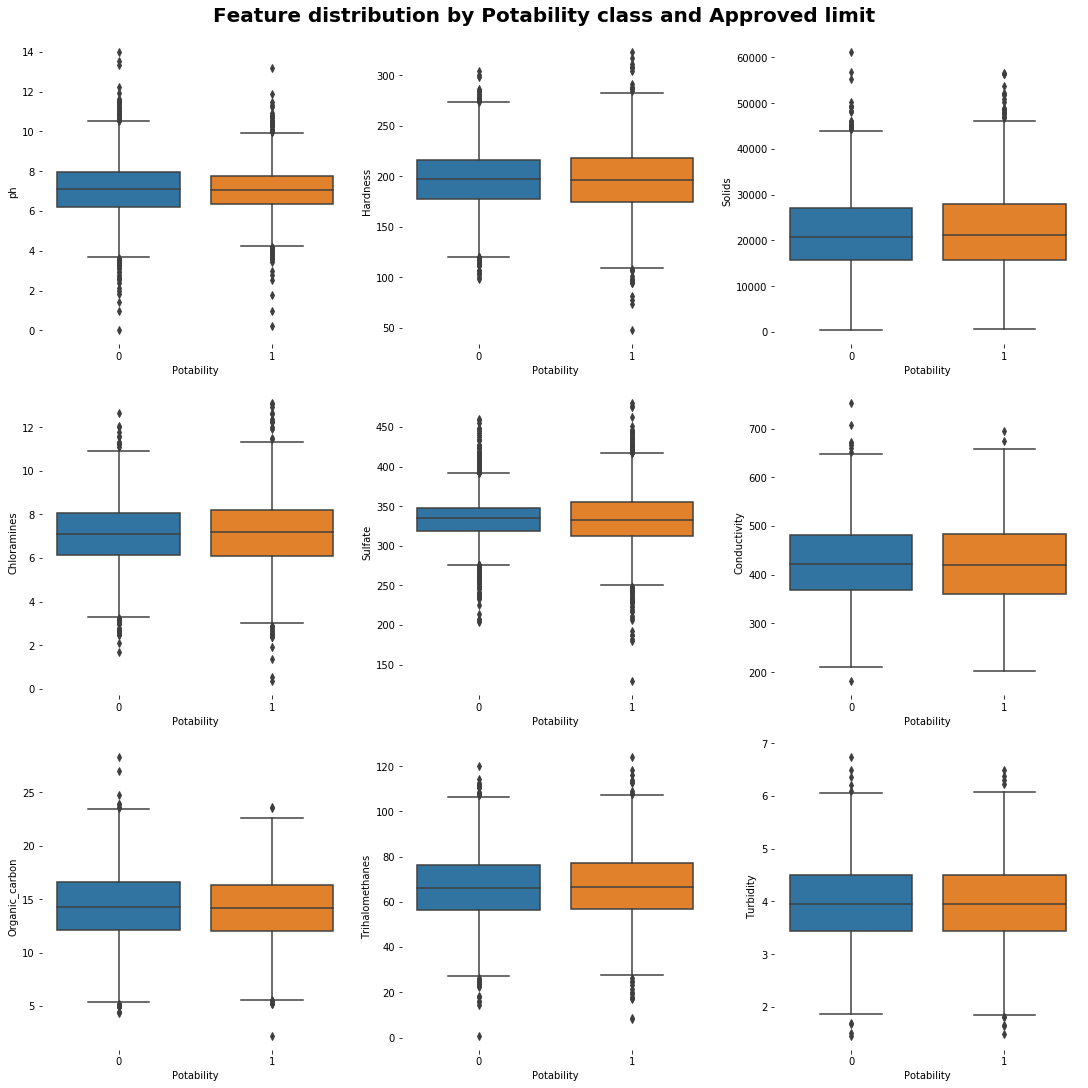

In [99]:
int_cols = data.select_dtypes(exclude=['category']).columns.to_list()
fig, ax= plt.subplots(nrows=3, ncols=3, figsize=(15,15), constrained_layout=True)
plt.suptitle('Feature distribution by Potability class and Approved limit', size=20, weight='bold')
ax=ax.flatten()
for x, i in enumerate(int_cols):
    if i == "Potability":
        continue
    sns.boxplot(data=data, y=i, x='Potability', ax=ax[x])
    for s in ['left','right','top','bottom']:
        ax[x].spines[s].set_visible(False)
    

In [100]:
#def IQ(IQR) :
 #   Q1=data.quantile(.25)
  #  Q3=data.quantile(.75)
   # IQR=Q3-Q1
   # mini=Q1-1.5*IQR
    #maxi=Q3+1.5*IQR
    #final=(data<=maxi)&(data>=mini)
    #data=data[final]

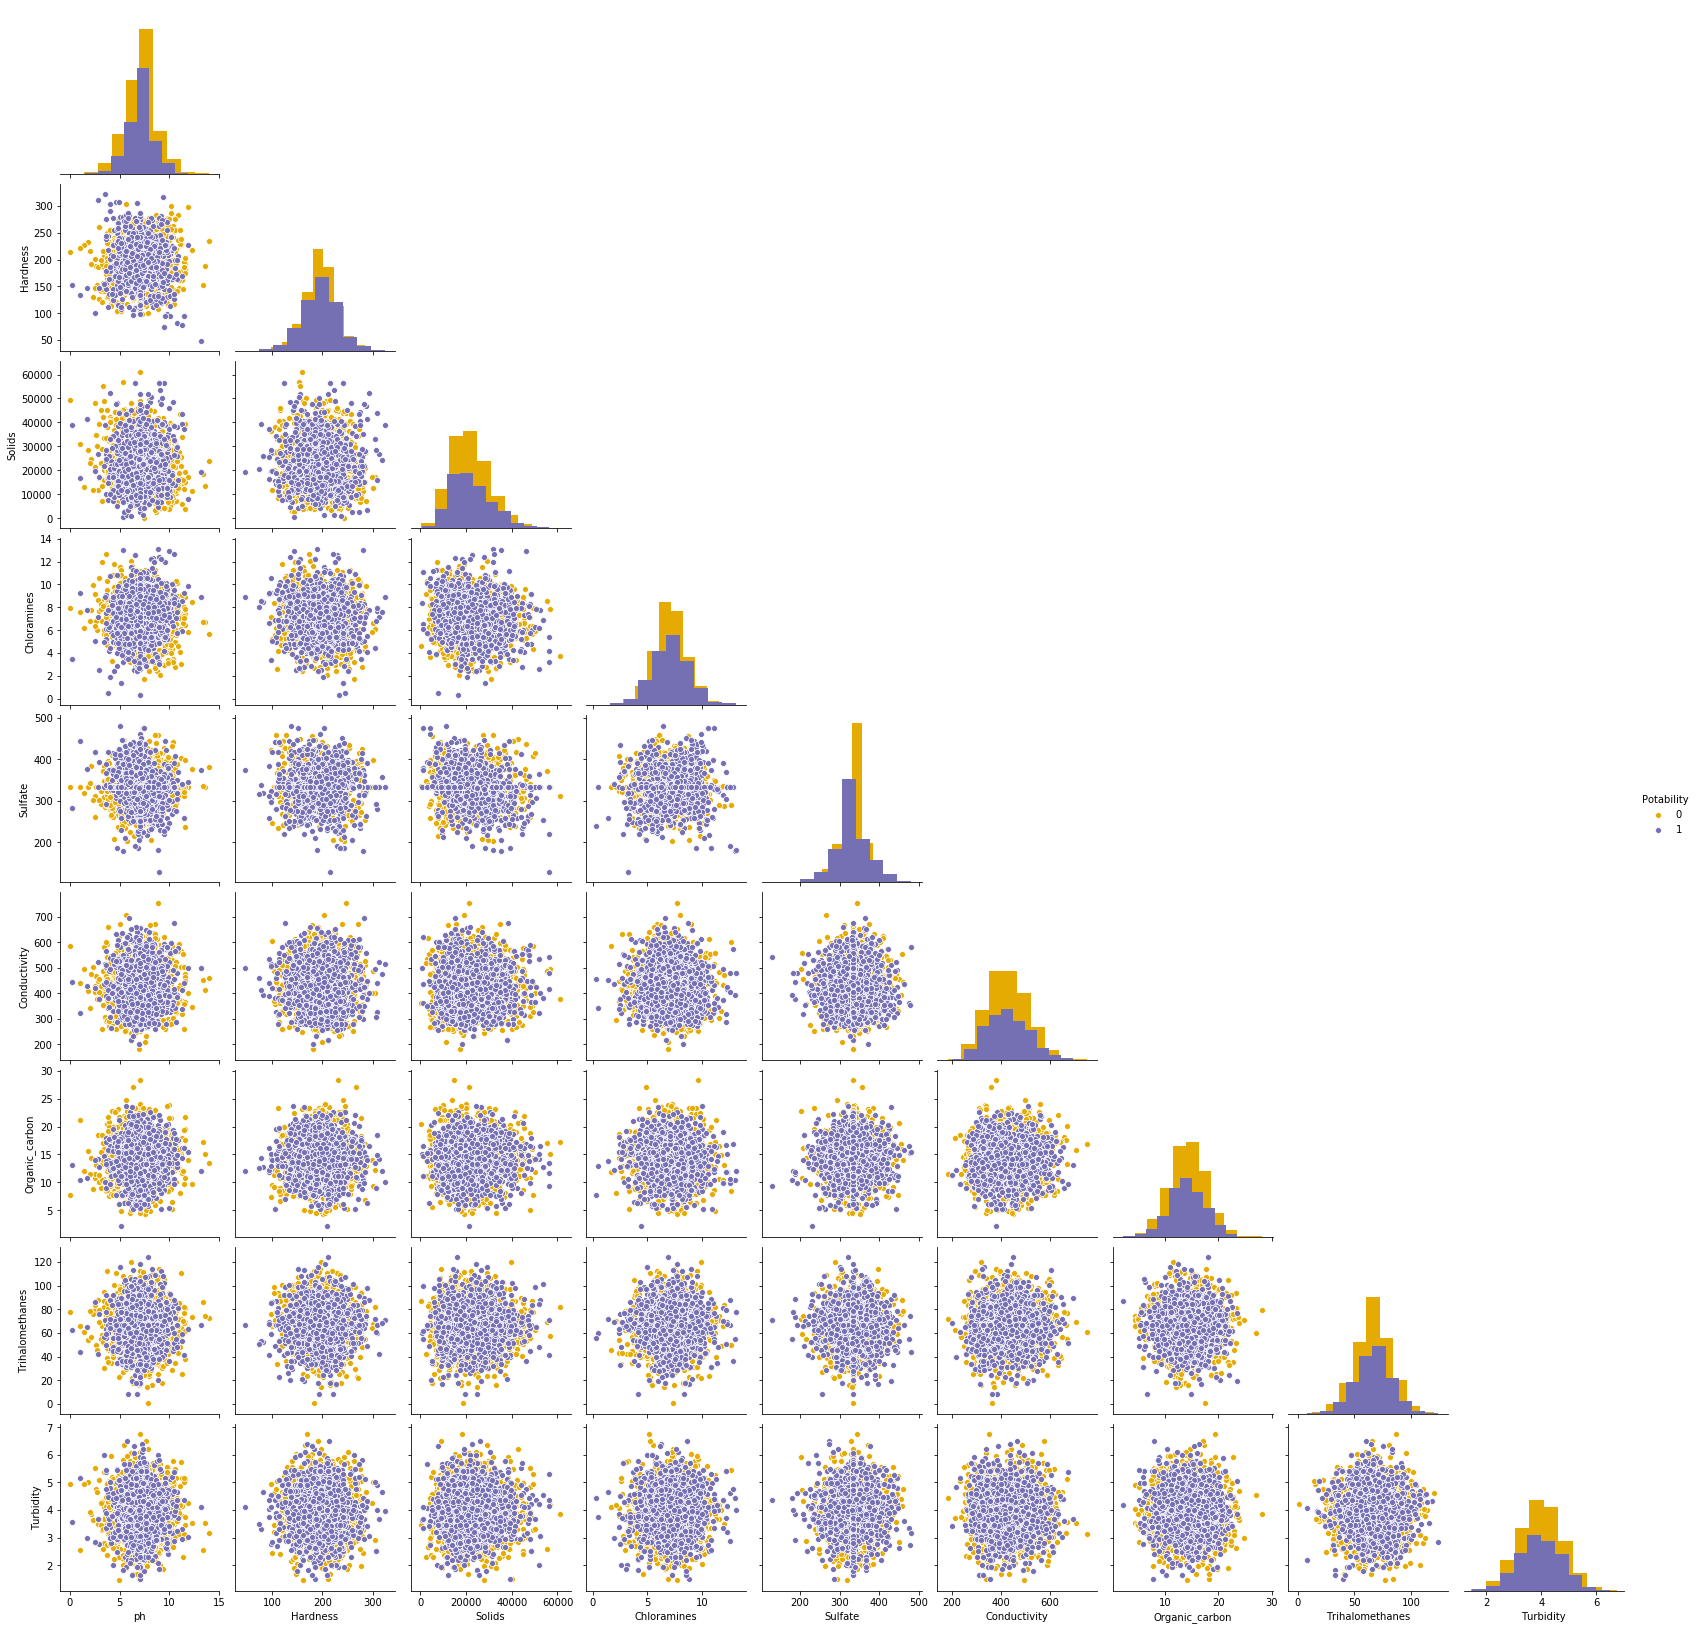

In [101]:
sns.pairplot(data=data,hue='Potability',diag_kind="hist",corner=True,palette='Dark2_r')

In [102]:
corr =data.corr()

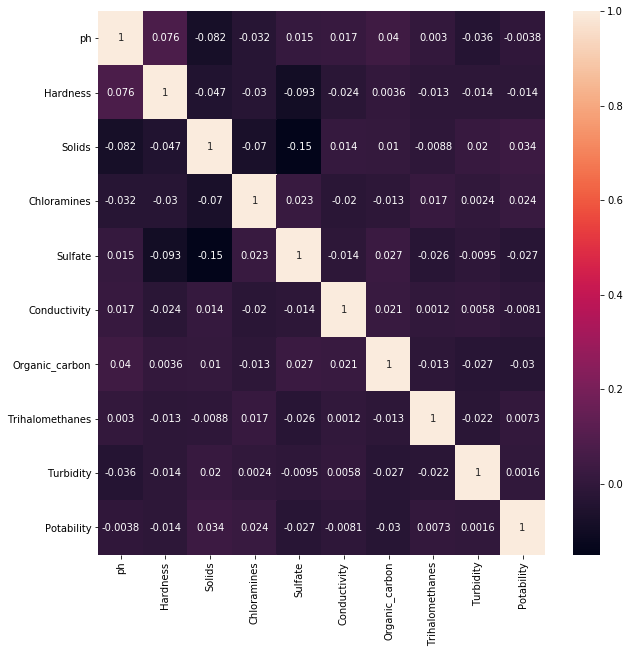

In [103]:
plt.figure(figsize=(10,10))
sns.heatmap(corr,annot=True)

In [104]:
X=data.drop(['Potability'],axis=1)

y=data['Potability']

In [105]:
from sklearn.ensemble import ExtraTreesClassifier
ex=ExtraTreesClassifier()
ex.fit(X,y)


ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100,
                     n_jobs=None, oob_score=False, random_state=None, verbose=0,
                     warm_start=False)

In [106]:
ex.feature_importances_


array([0.12642977, 0.11411018, 0.10560629, 0.10671824, 0.16581596,
       0.09725034, 0.09486406, 0.0965451 , 0.09266005])

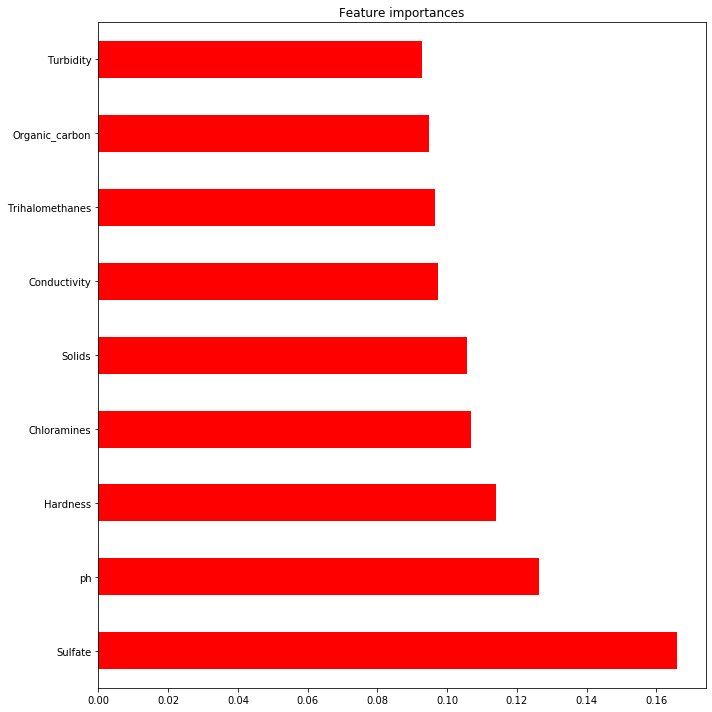

In [107]:
plt.figure(figsize=(10,10))
plt.title('Feature importances')
feat=pd.Series(ex.feature_importances_,index=X.columns)
feat.nlargest(10).plot(kind='barh', color="r", align="center")
plt.tight_layout()
plt.show()

In [108]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X=scaler.fit_transform(X)

In [109]:
from sklearn.model_selection import train_test_split ,cross_val_score ,cross_val_predict
from sklearn.metrics import confusion_matrix,classification_report ,roc_auc_score
X_train ,X_test,y_train ,y_test =train_test_split(X,y,test_size =.2 , random_state=42 , stratify=y)

In [110]:
from sklearn.neighbors import KNeighborsClassifier
neighbors=np.arange(1,30)
train_accuracy=np.empty(len(neighbors))
test_accuracy=np.empty(len(neighbors))
for i , j in enumerate(neighbors):
    knn= KNeighborsClassifier(n_neighbors=j)
    knn.fit(X_train,y_train)
    train_accuracy[i]=knn.score(X_train,y_train)
    test_accuracy[i]=knn.score(X_test,y_test)

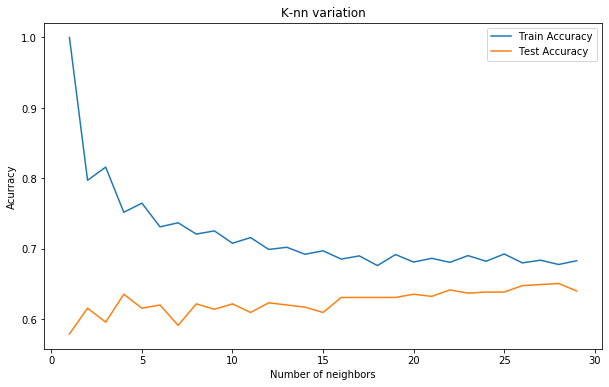

In [111]:
plt.figure(figsize=(10,6))
plt.plot(neighbors ,train_accuracy , label='Train Accuracy')
plt.plot(neighbors ,test_accuracy , label='Test Accuracy')
plt.title('K-nn variation')
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Acurracy')
plt.show()

In [112]:
knn=KNeighborsClassifier(n_neighbors=15)
knn.fit(X_train,y_train)
cv_result=cross_val_score(knn ,X_train,y_train,cv=5 , scoring='accuracy')
cv_result

array([0.63358779, 0.66030534, 0.6221374 , 0.66221374, 0.63358779])

In [113]:
y_pred=cross_val_predict(knn,X_test,y_test,cv=10)


In [114]:
classification_report(y_test,y_pred)


'              precision    recall  f1-score   support\n\n           0       0.62      0.81      0.71       400\n           1       0.44      0.23      0.30       256\n\n    accuracy                           0.59       656\n   macro avg       0.53      0.52      0.50       656\nweighted avg       0.55      0.59      0.55       656\n'

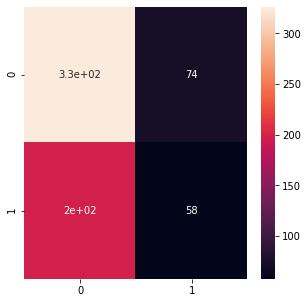

In [115]:
plt.figure(figsize=(5,5))
sns.heatmap(pd.DataFrame(confusion_matrix(y_test,y_pred)) , annot=True)

In [116]:
from sklearn.linear_model import LogisticRegression
log=LogisticRegression(random_state=42)
log.fit(X_train,y_train)
cv_result=cross_val_score(log ,X_train,y_train,cv=5 , scoring='accuracy')
cv_result

array([0.61068702, 0.61259542, 0.60877863, 0.60877863, 0.60877863])

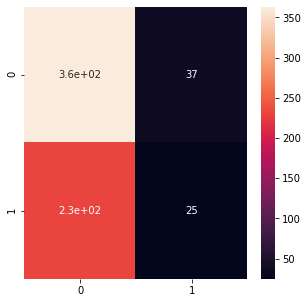

In [117]:
y_pred_log=cross_val_predict(log,X_test,y_test,cv=5)
plt.figure(figsize=(5,5))
sns.heatmap(pd.DataFrame(confusion_matrix(y_test,y_pred_log)) , annot=True)

In [118]:
classification_report(y_test,y_pred_log)


'              precision    recall  f1-score   support\n\n           0       0.61      0.91      0.73       400\n           1       0.40      0.10      0.16       256\n\n    accuracy                           0.59       656\n   macro avg       0.51      0.50      0.44       656\nweighted avg       0.53      0.59      0.51       656\n'

In [119]:
from sklearn.model_selection import GridSearchCV

params = [{

   'penalty' : ['l1', 'l2'],
    'C' : np.logspace(-4, 4, 20),
    'solver' : ['liblinear']}
    
  ]

grid = GridSearchCV(log, params, cv=5,
                           scoring='roc_auc',
                           return_train_score=True, refit=True, verbose=1)
grid.fit(X_train, y_train)

Fitting 5 folds for each of 40 candidates, totalling 200 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    4.0s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=42, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid=[{'C': array([1.00000000e-04, 2.63...
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
      

In [120]:
grid.best_params_


{'C': 0.0001, 'penalty': 'l1', 'solver': 'liblinear'}

In [121]:
grid.best_estimator_


LogisticRegression(C=0.0001, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l1',
                   random_state=42, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [122]:
grid.best_score_


0.5

In [123]:
y_pred = grid.predict(X_test)
roc_auc_score( y_test,y_pred)

0.5

In [124]:
from sklearn.linear_model import SGDClassifier
sgd=SGDClassifier(random_state=42,max_iter=1000, tol=1e-3)
sgd.fit(X_train,y_train)
cv_result=cross_val_score(sgd,X_train,y_train,cv=5 , scoring='roc_auc')
cv_result

array([0.49295343, 0.52074142, 0.53932292, 0.50731707, 0.48340087])

In [125]:
y_pred_sgd=cross_val_predict(sgd,X_test,y_test,cv=5)
confusion_matrix(y_test,y_pred_sgd)

array([[218, 182],
       [147, 109]], dtype=int64)

In [126]:
classification_report(y_test,y_pred_sgd)


'              precision    recall  f1-score   support\n\n           0       0.60      0.55      0.57       400\n           1       0.37      0.43      0.40       256\n\n    accuracy                           0.50       656\n   macro avg       0.49      0.49      0.48       656\nweighted avg       0.51      0.50      0.50       656\n'

using Support vector machine

In [127]:
from sklearn.svm import SVC
svc=SVC()
svc.fit(X_train,y_train)
cv_result=cross_val_score(svc ,X_train,y_train,cv=5 , scoring='roc_auc')
cv_result


array([0.67202819, 0.68952206, 0.72936581, 0.74100466, 0.69462497])

In [128]:
y_pred_svc=cross_val_predict(svc,X_test,y_test,cv=10)
confusion_matrix(y_test,y_pred_svc)

array([[373,  27],
       [202,  54]], dtype=int64)

In [129]:
classification_report(y_test,y_pred_svc)


'              precision    recall  f1-score   support\n\n           0       0.65      0.93      0.77       400\n           1       0.67      0.21      0.32       256\n\n    accuracy                           0.65       656\n   macro avg       0.66      0.57      0.54       656\nweighted avg       0.66      0.65      0.59       656\n'

In [130]:
params = { "kernel": ["linear", "poly", "rbf", "sigmoid"],
               "degree": [1, 2 ,3, 4, 5, 6] }

grid = GridSearchCV(svc, params, refit=True, verbose=1)
grid.fit(X_train, y_train)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 120 out of 120 | elapsed:   35.4s finished


GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'degree': [1, 2, 3, 4, 5, 6],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=1)

In [131]:
grid.best_params_


{'degree': 1, 'kernel': 'rbf'}

In [132]:
grid.best_estimator_



SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=1, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [133]:
y_pred = grid.predict(X_test)
roc_auc_score(y_pred, y_test)

0.6768345323741007

In [134]:
from sklearn.tree import DecisionTreeClassifier
tree=DecisionTreeClassifier(random_state=42)
tree.fit(X_train,y_train)
cv_result=cross_val_score(tree ,X_train,y_train,cv=5 , scoring='roc_auc')
cv_result

array([0.70790441, 0.69142157, 0.70477941, 0.71537579, 0.72077376])

In [135]:
y_pred_tree=cross_val_predict(tree,X_test,y_test,cv=10)
confusion_matrix(y_test,y_pred_tree)

array([[306,  94],
       [ 97, 159]], dtype=int64)

In [136]:
params = {
              'random_state':[42],
              'max_features': ['auto', 'sqrt', 'log2'], 
              'splitter' : ['best','random'], 
              'criterion':['entropy', 'gini']}


grid = GridSearchCV(tree, params, refit=True, verbose=1)
grid.fit(X_train, y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:    0.9s finished


GridSearchCV(cv=None, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=42,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'criterion': ['entropy', 'gini'],
                  

In [137]:
grid.best_params_


{'criterion': 'entropy',
 'max_features': 'auto',
 'random_state': 42,
 'splitter': 'best'}

In [138]:
grid.best_estimator_


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

In [139]:
y_pred = grid.predict(X_test)
roc_auc_score(y_pred, y_test)

0.7136282069935496

In [140]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(n_estimators=50)
rf.fit(X_train,y_train)
cv_result=cross_val_score(rf ,X_train,y_train,cv=5 , scoring='roc_auc')
cv_result

array([0.85120251, 0.8314951 , 0.86323529, 0.85587583, 0.86249713])

In [141]:
y_pred_rf=cross_val_predict(rf,X_test,y_test,cv=10)
confusion_matrix(y_test,y_pred_rf)

array([[354,  46],
       [109, 147]], dtype=int64)

In [142]:
params = {'n_estimators': [100, 200, 300], 
              'max_features': ['auto', 'sqrt', 'log2'], 
              'bootstrap': [True, False], 
              'criterion':['entropy', 'gini']}

grid = GridSearchCV(RandomForestClassifier(), params, refit=True, verbose=1)
grid.fit(X_train, y_train)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 180 out of 180 | elapsed: 12.5min finished


GridSearchCV(cv=None, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              ra

In [143]:
grid.best_params_



{'bootstrap': True,
 'criterion': 'entropy',
 'max_features': 'sqrt',
 'n_estimators': 100}

In [144]:
grid.best_estimator_


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [145]:
y_pred = rf.predict(X_test)
roc_auc_score(y_pred, y_test)

0.7915401301518438

In [146]:
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier()
gb.fit(X_train, y_train)
y_pred = gb.predict(X_test)

our best

In [147]:
roc_auc_score(y_pred, y_test)

0.7990972733971997

In [148]:
params = {'loss':['deviance','exponential']
         ,'n_estimators': [100, 200, 300], 
              'max_features': ['auto', 'sqrt', 'log2'], 
             
              }

grid = GridSearchCV(gb, params, refit=True, verbose=1)
grid.fit(X_train, y_train)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  90 out of  90 | elapsed:  2.4min finished


GridSearchCV(cv=None, error_score=nan,
             estimator=GradientBoostingClassifier(ccp_alpha=0.0,
                                                  criterion='friedman_mse',
                                                  init=None, learning_rate=0.1,
                                                  loss='deviance', max_depth=3,
                                                  max_features=None,
                                                  max_leaf_nodes=None,
                                                  min_impurity_decrease=0.0,
                                                  min_impurity_split=None,
                                                  min_samples_leaf=1,
                                                  min_samples_split=2,
                                                  min_weight_fraction_leaf=0.0,
                                                  n_estimators=100,
                                                  n_iter_n...ge=None,
         

In [149]:
grid.best_params_


{'loss': 'exponential', 'max_features': 'auto', 'n_estimators': 200}

In [150]:
grid.best_estimator_


GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='exponential', max_depth=3,
                           max_features='auto', max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=200,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [158]:
y_pred_gb=grid.predict(X_test)

In [160]:
roc_auc_score(y_test,y_pred_gb)

0.763046875

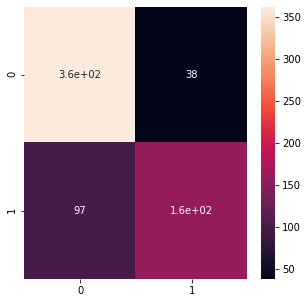

In [165]:
plt.figure(figsize=(5,5))
sns.heatmap(pd.DataFrame(confusion_matrix(y_test,y_pred_gb)) , annot=True)

In [166]:
classification_report(y_test, y_pred_gb)


'              precision    recall  f1-score   support\n\n           0       0.79      0.91      0.84       400\n           1       0.81      0.62      0.70       256\n\n    accuracy                           0.79       656\n   macro avg       0.80      0.76      0.77       656\nweighted avg       0.80      0.79      0.79       656\n'